In [8]:
# Standard import for pandas, numpy and matplot
import pandas as pd
import matplotlib
import re

In [53]:
# Read in the csv file and display some of the basic info
survey=pd.read_csv("GIS_Official_Survey.csv",parse_dates=['Timestamp'])
print("Data types in the file:")
print(survey.dtypes)

Data types in the file:
Timestamp                                                                                                          datetime64[ns]
Gender                                                                                                                     object
What country do you live in?                                                                                               object
If United States, what state?                                                                                              object
What is your age?                                                                                                          object
What is the highest level of education you have completed?                                                                 object
If you obtained more than an Bachelor's (Undergraduate) Degree (like a Masters or PhD), would you recommend it?            object
Job status                                                        

In [15]:
# Read in the 2017 csv file and display some of the basic info
survey2017=pd.read_csv("GIS_Official_Survey_2017.csv",parse_dates=['Timestamp'])
print("Data types in the file:")
print(survey.dtypes)

Data types in the file:
Timestamp                                                                                                          datetime64[ns]
Gender                                                                                                                     object
What country do you live in?                                                                                               object
If United States, what state?                                                                                              object
What is your age?                                                                                                          object
What is the highest level of education you have completed?                                                                 object
If you obtained more than an Bachelor's (Undergraduate) Degree (like a Masters or PhD), would you recommend it?            object
Job status                                                        

In [37]:
%matplotlib inline

#Set matplotlib default styles:
font = {'family' : 'Sans Serif',
        'size'   : 14}

matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (10, 6)

#Set Pandas display options:
# pd.set_option('display.height', 500) Depreciated in Pandas
pd.set_option('display.max_rows', 500)

#Set Pandas warning options:
pd.options.mode.chained_assignment = None  # default='warn'

Gender counts:
Gender
Female                       102
Male                         486
Other / Prefer not to say      7
dtype: int64

Gender percentages:
Gender
Female                       17.142857
Male                         81.680672
Other / Prefer not to say     1.176471
dtype: float64

Gender percentages 2017:
Gender
Female                       15.763547
Male                         83.004926
Other / Prefer not to say     1.231527
dtype: float64


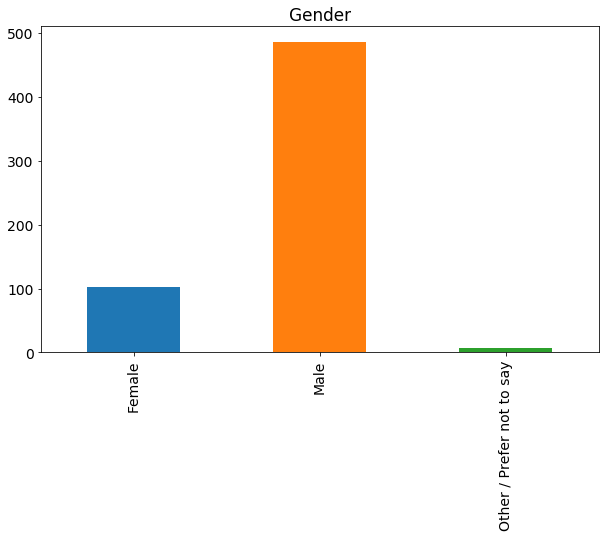

In [17]:
print("Gender counts:")
oth = survey.groupby('Gender').size().sort_values(ascending=False).index[2:]
survey_new  = survey.replace(oth, 'Other / Prefer not to say')
var = survey_new.groupby('Gender').size()
print(var)

print("\nGender percentages:")
var2 = survey_new.groupby('Gender').size() * 100 / len(survey)
print(var2)

print("\nGender percentages 2017:")
oth2017 = survey2017.groupby('Gender').size().sort_values(ascending=False).index[2:]
survey_new2017  = survey2017.replace(oth2017, 'Other / Prefer not to say')
var3 = survey_new2017.groupby('Gender').size() * 100 / len(survey2017)
print(var3)

my_plot = var.plot(kind='bar', title="Gender")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Country counts:
What country do you live in?
United States     383
Canada             64
United Kingdom     23
Australia          18
Germany            11
New Zealand         8
Netherlands         7
Norway              6
South Africa        6
Mexico              5
Ireland             5
Switzerland         4
Philippines         4
Brazil              3
Sweden              3
Austria             3
Colombia            3
Czechia             2
Estonia             2
Hong Kong           2
Kenya               2
Italy               2
France              1
Chile               1
Cameroon            1
Indonesia           1
Greece              1
Guyana              1
Finland             1
Hungary             1
India               1
Denmark             1
Vietnam             1
Israel              1
Kazakhstan          1
Uganda              1
Thailand            1
Spain               1
Slovenia            1
Serbia              1
Rwanda              1
Russia              1
Romania             1
Portugal 

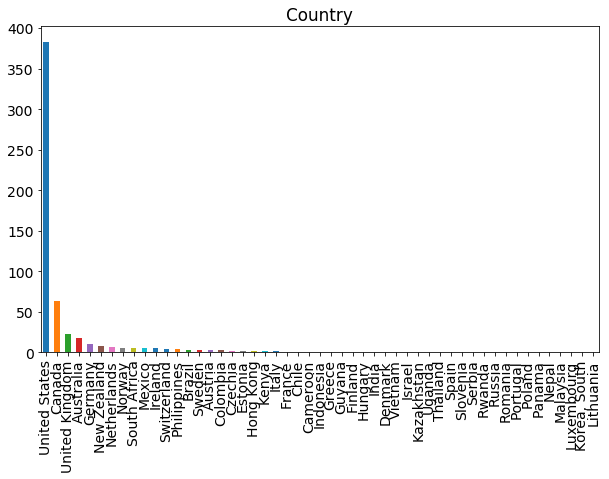

In [18]:
print("Country counts:")
var = survey.groupby('What country do you live in?').size().sort_values(ascending=False)
print(var)

print("\nCountry percentages:")
var2 = survey.groupby('What country do you live in?').size() * 100 / len(survey)
print(var2.sort_values(ascending=False))

my_plot = var.plot(kind='bar', title="Country")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).


US vs NonUS
What country do you live in?
United States    383
Other            212
dtype: int64

Country percentages:
What country do you live in?
United States    64.369748
Other            35.630252
dtype: float64


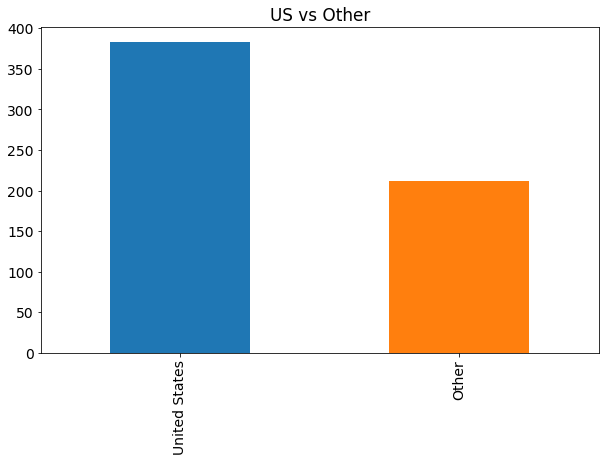

In [19]:
print("\nUS vs NonUS")

# Grab all countries apart from the US. So second onwards.
not_US = survey.groupby('What country do you live in?').size().sort_values(ascending=False).index[1:]
survey_new  = survey.replace(not_US, 'Other')
survey_new.groupby('What country do you live in?').size()

var = survey_new.groupby('What country do you live in?').size().sort_values(ascending=False)
print(var)

print("\nCountry percentages:")
var2 = survey_new.groupby('What country do you live in?').size() * 100 / len(survey)
print(var2.sort_values(ascending=False))

my_plot = var.plot(kind='bar', title="US vs Other")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

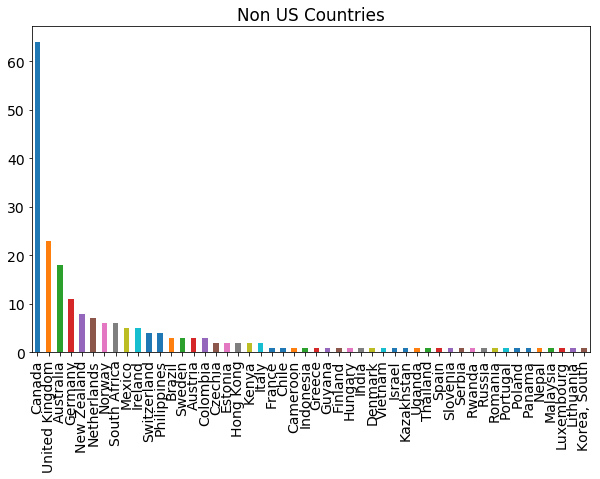

In [20]:
#Non us country plot
mask = survey['What country do you live in?'].isin(["United States"])
non_us_survey = survey[~mask]
var3 = non_us_survey.groupby('What country do you live in?').size().sort_values(ascending=False)

my_plot2 = var3.plot(kind='bar', title="Non US Countries")
my_plot2.set_xlabel("")
my_plot2.set_ylabel("")
my_plot2.patch.set_facecolor('None') #or ax.patch.set_visible(False).

State counts:
If United States, what state?
California        46
Texas             38
Virginia          18
Ohio              17
Minnesota         15
Florida           14
Georgia           14
New York          13
Oregon            13
Washington        13
North Carolina    13
Maryland          13
Pennsylvania      11
Colorado          10
New Jersey        10
Arizona           10
Massachusetts      9
Oklahoma           8
Tennessee          8
Michigan           7
Utah               6
South Carolina     6
Illinois           5
New Mexico         5
Wisconsin          4
Kentucky           4
Kansas             4
Indiana            4
Alaska             3
Arkansas           3
Louisiana          3
Washington D.C     3
Missouri           2
Montana            2
South Dakota       2
Iowa               2
Vermont            2
West Virginia      2
Alabama            2
Wyoming            1
Maine              1
Nevada             1
North Dakota       1
Nebraska           1
dtype: int64

State percentages:

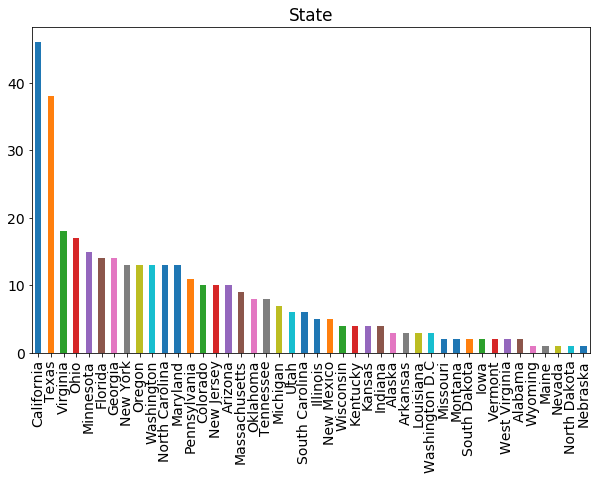

In [21]:
#US State
mask = survey['What country do you live in?'].isin(["United States"])
us_survey = survey[mask]

print("State counts:")
var = us_survey.groupby('If United States, what state?').size().sort_values(ascending=False)
print(var)

print("\nState percentages:")
var2 = us_survey.groupby('If United States, what state?').size() * 100 / len(us_survey)
print(var2.sort_values(ascending=False))

my_plot = var.plot(kind='bar', title="State")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Age counts:
What is your age?
17 or younger          1
18 to 24             121
25 to 34             317
35 to 44             116
45 to 54              33
55 to 64               4
65 to 74               1
Prefer not to say      2
dtype: int64

Age percentages:
What is your age?
17 or younger         0.168067
18 to 24             20.336134
25 to 34             53.277311
35 to 44             19.495798
45 to 54              5.546218
55 to 64              0.672269
65 to 74              0.168067
Prefer not to say     0.336134
dtype: float64


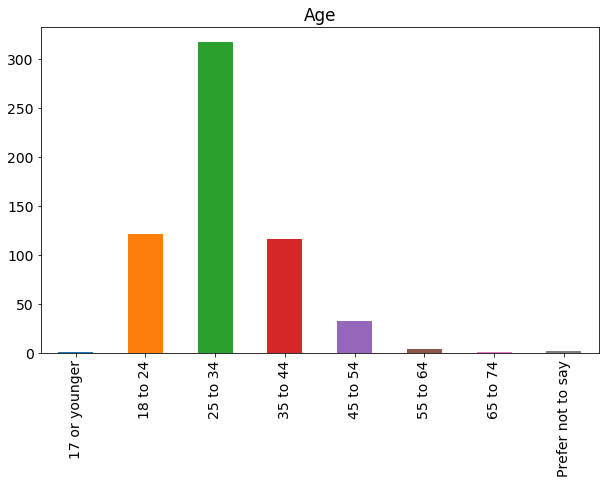

In [22]:
print("Age counts:")
var = survey.groupby('What is your age?').size()
print(var)

print("\nAge percentages:")
var2 = survey.groupby('What is your age?').size() * 100 / len(survey)
print(var2)

my_plot = var.plot(kind='bar', title="Age")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Education counts:
What is the highest level of education you have completed?
Bachelor's (Undergraduate) Degree                           311
Master's Degree                                             194
High School or equivalent                                    38
2-Year Degree (Technical, Certificate, Associate's, etc)     30
Doctorate degree                                             16
Less than High School                                         1
In college, Junior in GIS                                     1
Graduate Certificate                                          1
Got a B.S. getting a Masters now.                             1
Bachelors and Graduate Certificate                            1
Bachelor of Arts Honours - Archaeology                        1
dtype: int64
Education counts:
What is the highest level of education you have completed?
Bachelor's (Undergraduate) Degree                           311
Master's Degree                                             194
H

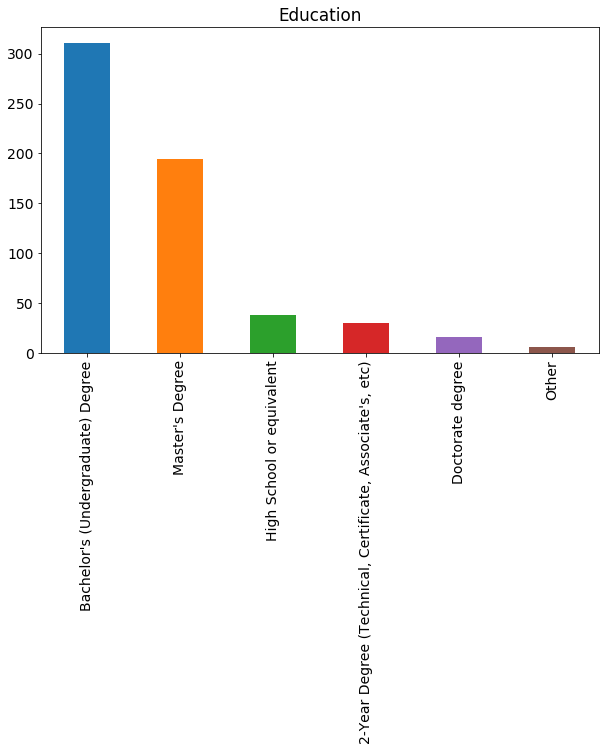

In [25]:
print("Education counts:")
var = survey.groupby('What is the highest level of education you have completed?').size().sort_values(ascending=False)
print(var)

# Create Other Category
other_edu = survey.groupby('What is the highest level of education you have completed?').size().sort_values(ascending=False).index[5:]
survey_new  = survey.replace(other_edu, 'Other')
survey_new.groupby('What is the highest level of education you have completed?').size()

print("Education counts:")
var = survey_new.groupby('What is the highest level of education you have completed?').size().sort_values(ascending=False)
print(var)

print("\nEducation percentages:")
var2 = survey_new.groupby('What is the highest level of education you have completed?').size() * 100 / len(survey)
print(var2.sort_values(ascending=False))

my_plot = var.plot(kind='bar', title="Education")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Counts:
If you obtained more than an Bachelor's (Undergraduate) Degree (like a Masters or PhD), would you recommend it?
Yes      131
Maybe     68
No        10
dtype: int64

Percentages:
If you obtained more than an Bachelor's (Undergraduate) Degree (like a Masters or PhD), would you recommend it?
Yes      54.583333
Maybe    28.333333
No        4.166667
dtype: float64

Masters vs PhD:
a      b                                                       
Yes    Master's Degree                                             118
Maybe  Master's Degree                                              64
Yes    Doctorate degree                                             10
No     Master's Degree                                               5
Maybe  Doctorate degree                                              4
Yes    2-Year Degree (Technical, Certificate, Associate's, etc)      3
No     2-Year Degree (Technical, Certificate, Associate's, etc)      3
       Doctorate degree                             

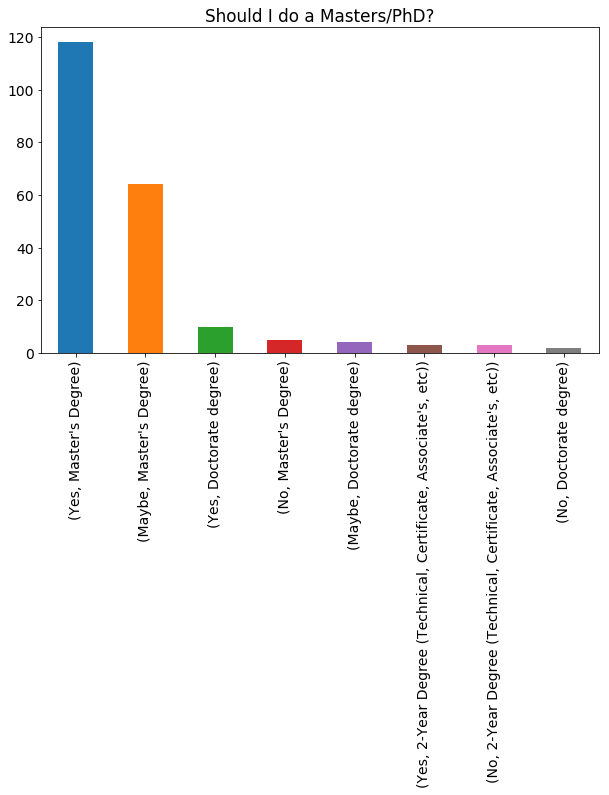

In [32]:
# Should I do a Masters/PhD
mask = survey['What is the highest level of education you have completed?'].isin(["Master's Degree","2-Year Degree (Technical, Certificate, Associate's, etc)","Doctorate degree"])
higher_edu_survey = survey[mask]

print("Counts:")
var = higher_edu_survey.groupby("If you obtained more than an Bachelor's (Undergraduate) Degree (like a Masters or PhD), would you recommend it?").size().sort_values(ascending=False).nlargest(3)
print(var)

print("\nPercentages:")
var2 = higher_edu_survey.groupby("If you obtained more than an Bachelor's (Undergraduate) Degree (like a Masters or PhD), would you recommend it?").size() * 100 / len(higher_edu_survey)
print(var2.sort_values(ascending=False).nlargest(3))

# Rename our colmun, who designed this survey!?!?!
higher_edu_survey2 = higher_edu_survey[["If you obtained more than an Bachelor's (Undergraduate) Degree (like a Masters or PhD), would you recommend it?", "What is the highest level of education you have completed?"]]
higher_edu_survey2.columns = ['a', 'b']

print("\nMasters vs PhD:")
var3 = higher_edu_survey2.groupby(['a', 'b']).size().sort_values(ascending=False).nlargest(8)
print(var3)

my_plot = var3.plot(kind='bar', title="Should I do a Masters/PhD?")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Job status counts:
Job status
Mid level                                          266
Entry level                                        137
Student - University/College                        80
Mangement                                           53
Looking for work                                    23
Self employed (Entrepreneur, Freelancer, etc..)     20
Academic                                             2
Military                                             1
Employed in other field, recent grad                 1
Higher-level technical / non-management              1
Internship                                           1
Voluntary work                                       1
On Sabbatical                                        1
Student and hairstylist                              1
Peace Corps                                          1
Senior Architect - non management                    1
Senior Level                                         1
Senior level, non-managerial.      

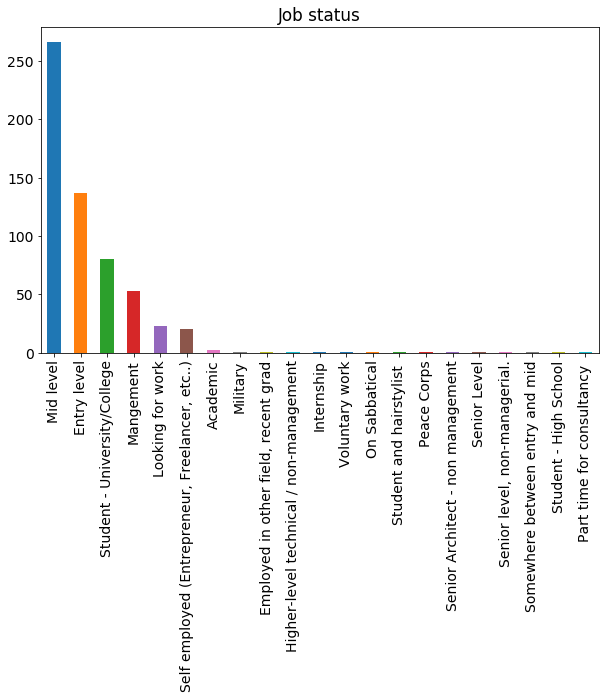

In [33]:
print("Job status counts:")
var = survey.groupby('Job status').size().sort_values(ascending=False)
print(var)

print("\nJob status percentages:")
var2 = survey.groupby('Job status').size() * 100 / len(survey)
print(var2.sort_values(ascending=False))

my_plot = var.plot(kind='bar', title="Job status")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Income level
Income counts:
Income level in US Dollars
Under 20000         98
20000 - 30000       43
30000 - 40000       51
40000 - 50000       90
50000 - 75000      186
75000 - 100000      91
100000 - 150000     32
150000 or more       4
dtype: int64

Income percentages:
Income level in US Dollars
Under 20000        16.470588
20000 - 30000       7.226891
30000 - 40000       8.571429
40000 - 50000      15.126050
50000 - 75000      31.260504
75000 - 100000     15.294118
100000 - 150000     5.378151
150000 or more      0.672269
dtype: float64


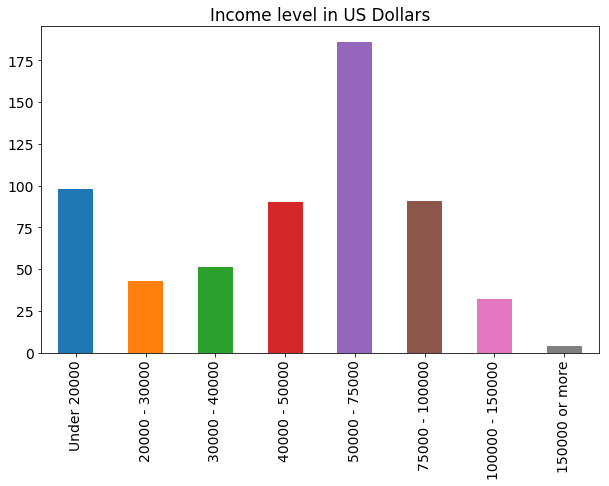

In [34]:
print("Income level")

survey=pd.read_csv("GIS_Official_Survey.csv",parse_dates=['Timestamp'])

income_survey = None
income_survey = survey

# $ Mess up matplotlib charts
income_survey['Income level in US Dollars'] = income_survey['Income level in US Dollars'].replace('\\$|,', '', regex=True)

income_survey['Income level in US Dollars'] = pd.Categorical(income_survey['Income level in US Dollars'], ["Under 20000","20000 - 30000","30000 - 40000","40000 - 50000","50000 - 75000","75000 - 100000","100000 - 150000","150000 or more"])

print("Income counts:")
var = income_survey.groupby('Income level in US Dollars').size()
print(var)

print("\nIncome percentages:")
var2 = income_survey.groupby('Income level in US Dollars').size() * 100 / len(survey)
print(var2)

my_plot = var.plot(kind='bar', title="Income level in US Dollars")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).


How long have you been working?

Count:
How long have you been working?
Not employed.        53
Under 1 year         83
1-2 years            70
2-5 years           137
5-10 years          133
11-25 years         108
26 or more years     11
dtype: int64

Percentage:
How long have you been working?
Not employed.        8.907563
Under 1 year        13.949580
1-2 years           11.764706
2-5 years           23.025210
5-10 years          22.352941
11-25 years         18.151261
26 or more years     1.848739
dtype: float64


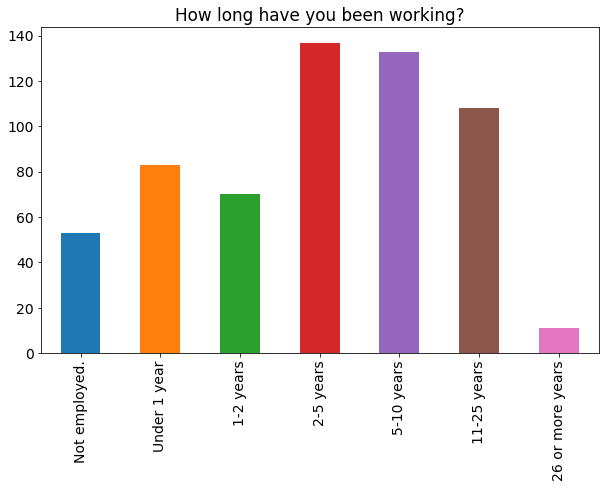

In [36]:
print("How long have you been working?")

work_len_survey = survey
work_len_survey['How long have you been working?'] = pd.Categorical(work_len_survey['How long have you been working?'], ["Not employed.","Under 1 year","1-2 years","2-5 years","5-10 years","11-25 years","26 or more years"])

print("\nCount:")
var = work_len_survey.groupby('How long have you been working?').size()
print(var)

print("\nPercentage:")
var2 = work_len_survey.groupby('How long have you been working?').size() * 100 / len(survey)
print(var2)

my_plot = var.plot(kind='bar', title="How long have you been working?")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Work length vs salary:


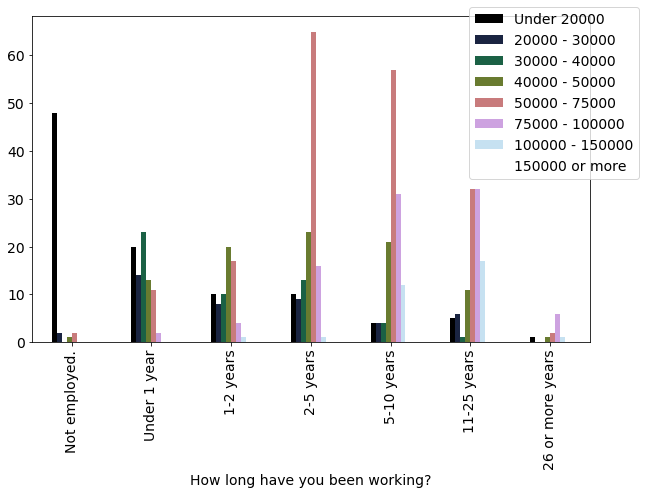

In [38]:
print("Work length vs salary:")

survey=pd.read_csv("GIS_Official_Survey.csv",parse_dates=['Timestamp'])
work_len_salary = survey[['Income level in US Dollars','How long have you been working?']]

work_len_salary['Income level in US Dollars'] = work_len_salary['Income level in US Dollars'].replace('\\$|,', '', regex=True)
work_len_salary['Income level in US Dollars'] = pd.Categorical(work_len_salary['Income level in US Dollars'], ["Under 20000","20000 - 30000","30000 - 40000","40000 - 50000","50000 - 75000","75000 - 100000","100000 - 150000","150000 or more"])
work_len_salary['How long have you been working?'] = pd.Categorical(work_len_salary['How long have you been working?'], ["Not employed.","Under 1 year","1-2 years","2-5 years","5-10 years","11-25 years","26 or more years"])

var_count = work_len_salary.groupby(['Income level in US Dollars', 'How long have you been working?']).size().reset_index(name='count')

var_count.pivot(index='How long have you been working?', columns='Income level in US Dollars' , values='count').plot(kind='bar', colormap='cubehelix').legend(bbox_to_anchor=(1.1, 1.05))

In [43]:
print("Job Title")

# Create Other Category
other_work = survey.groupby('If employed, what is your current job title (without the GIS)?').size().sort_values(ascending=False).index[19:]
work_new  = survey.replace(other_work, 'Other')

print("\nCount:")
var = work_new.groupby('If employed, what is your current job title (without the GIS)?').size() #.sort_values(ascending=False)
print(var)

Job Title

Count:
If employed, what is your current job title (without the GIS)?
Administrator               3
Analyst                   124
Cartographer                5
Consultant                 40
Coordinator                16
Database Administrator      2
Developer                  50
Director                    2
Geologist                   2
Intern                     29
Manager                    28
Other                      61
Planner                     2
Project Manager             9
Research Analyst           13
Research Assistant         14
Researcher                 12
Specialist                 60
Support Specialist         10
Technician                 52
dtype: int64


In [45]:
print("Industry")

print("\nWorks in/with Government:")
print(survey['What industry do you work in?'].str.contains(r'Gov|gov').sum(), "out of", len(survey))

print("\nCount:")
other_industry = survey.groupby('What industry do you work in?').size().sort_values(ascending=False).index[27:]
ind_new  = survey.replace(other_industry, 'Other')

var = ind_new.groupby('What industry do you work in?').size().sort_values(ascending=False)
print(var)


Industry

Works in/with Government:
139 out of 595

Count:
What industry do you work in?
Local Government      109
GIS                    44
Environmental          40
Utilities              38
Academia               35
Other                  30
Consulting             29
Central Government     28
Civil Engineering      22
Transportation         21
Defense                20
Oil and Gas            19
Natural Resources      17
IT                     12
Forestry               11
Engineering            10
Energy                 10
Non-Profit              9
Telecommunications      8
Real Estate             7
Archaeology             7
Public Health           7
Education               6
Insurance               4
Agriculture             3
NGO                     3
Tribal                  2
Aviation                2
dtype: int64


What desktop GIS software do you use?
Counts:
ArcGIS                                 531
QGIS                                   304
Google Earth                           279
AutoCAD                                102
GRASS                                   68
Global Mapper                           39
ERDAS                                   37
ENVI                                    32
MapInfo                                 21
SmallWorld                              12
FME                                      5
JOSM                                     3
Idrisi                                   3
Microstation                             3
None                                     3
R                                        2
Manifold                                 2
PCI Geomatica                            2
Geomedia                                 1
GeoMedia Professional                    1
GeoEye                                   1
Geoda                                    1
GeoDa   

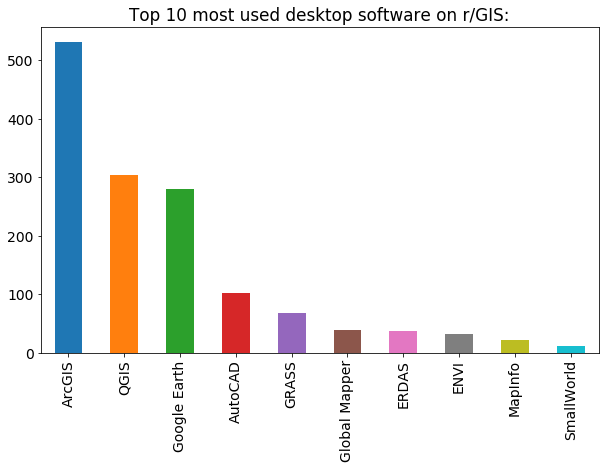

In [64]:
print("What desktop GIS software do you use?")

# Clean a bit
survey['What desktop GIS software do you use?'] = survey['What desktop GIS software do you use?'].fillna('Null')
survey['What desktop GIS software do you use?'] = survey['What desktop GIS software do you use?'].replace(',', ';', regex=True)
survey['What desktop GIS software do you use?'] = survey['What desktop GIS software do you use?'].replace('; | ;', ';', regex=True)

# Strip extra space at start/end
survey['What desktop GIS software do you use?'] = survey['What desktop GIS software do you use?'].map(lambda x: str(x).strip())

# Rename our colmun, who designed this survey!?!?!
ss = survey[["What desktop GIS software do you use?"]]
ss.columns = ['a']

# Seperate out semicolon seperated software lists
survey_software_list = ss.a.str.get_dummies(sep=";")

print("Counts:")
var = survey_software_list.sum().sort_values(ascending=False)
print(var)

print("\nPercentages:")
var2 = (survey_software_list.sum() / len(survey)) * 100
print(var2.sort_values(ascending=False).nlargest(10))

var = var.nlargest(10)
my_plot = var.plot(kind='bar', title="Top 10 most used desktop software on r/GIS:")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

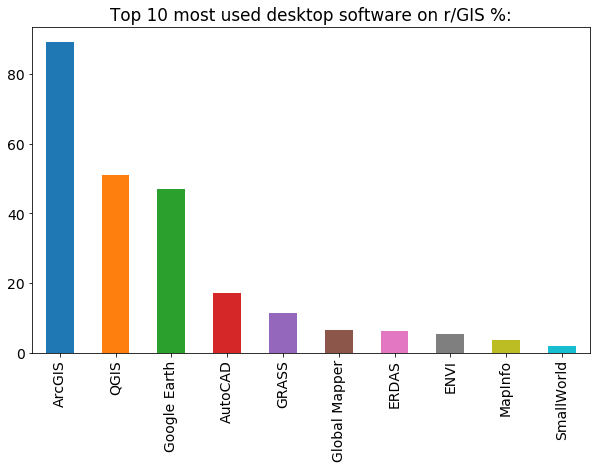

In [66]:
var2 = var2.nlargest(10)
my_plot = var2.plot(kind='bar', title="Top 10 most used desktop software on r/GIS %:")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

What desktop GIS software do you mainly use?
ArcGIS           464
QGIS             103
Other              9
None               6
MapInfo            4
AutoCAD            4
SmallWorld         2
Global Mapper      2
Google Earth       1
dtype: int64

Percentages:
What desktop GIS software do you mainly use?
ArcGIS           77.983193
QGIS             17.310924
Other             1.512605
None              1.008403
MapInfo           0.672269
AutoCAD           0.672269
SmallWorld        0.336134
Global Mapper     0.336134
Google Earth      0.168067
dtype: float64


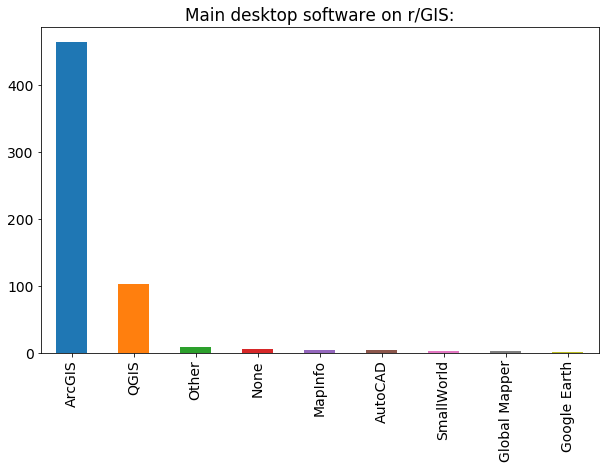

In [67]:
var = survey.groupby('What desktop GIS software do you mainly use?').size().sort_values(ascending=False)
print(var)

print("\nPercentages:")
var2 = survey.groupby('What desktop GIS software do you mainly use?').size() * 100 / len(survey)
print(var2.sort_values(ascending=False))


my_plot = var.plot(kind='bar', title="Main desktop software on r/GIS:")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

If ArcGIS, are you using Pro?
No             182
A bit          146
Primarily       99
50/50           71
Exclusively     34
dtype: int64

Percentages:
If ArcGIS, are you using Pro?
No             30.588235
A bit          24.537815
Primarily      16.638655
50/50          11.932773
Exclusively     5.714286
dtype: float64


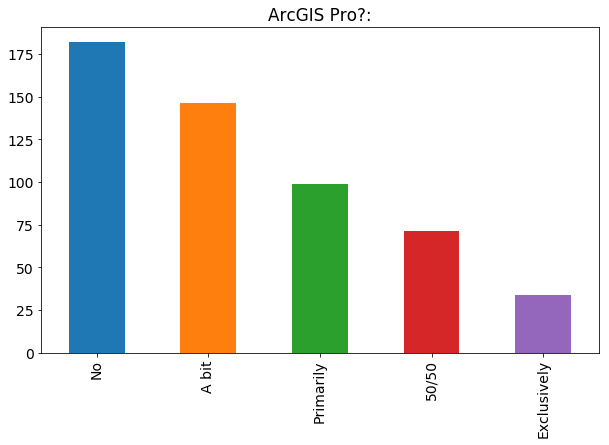

In [79]:
var = survey.groupby('If ArcGIS, are you using Pro?').size().sort_values(ascending=False)
print(var)

print("\nPercentages:")
var2 = survey.groupby('If ArcGIS, are you using Pro?').size() * 100 / len(survey)
print(var2.sort_values(ascending=False))


my_plot = var.plot(kind='bar', title="ArcGIS Pro?:")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Do you use any design software to finish your maps?
No             417
Illustrator     76
GIMP            33
PhotoShop       28
InkScape        25
Other           16
dtype: int64

Percentages:
Do you use any design software to finish your maps?
No             70.084034
Illustrator    12.773109
GIMP            5.546218
PhotoShop       4.705882
InkScape        4.201681
Other           2.689076
dtype: float64


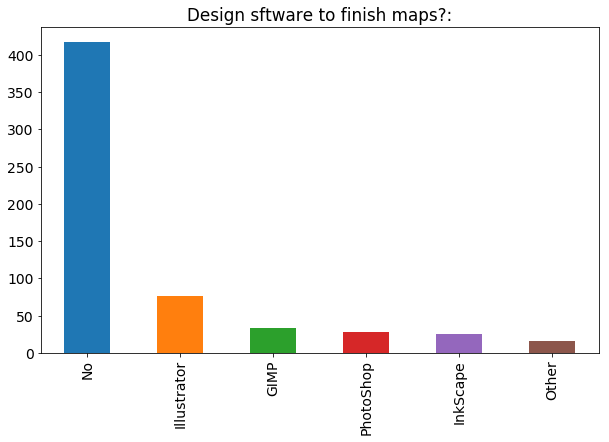

In [84]:
other_desig = survey.groupby('Do you use any design software to finish your maps?').size().sort_values(ascending=False).index[5:]
desig_new  = survey.replace(other_desig, 'Other')

var = desig_new.groupby('Do you use any design software to finish your maps?').size().sort_values(ascending=False)
print(var.sort_values(ascending=False))

print("\nPercentages:")
var2 = desig_new.groupby('Do you use any design software to finish your maps?').size() * 100 / len(survey)
print(var2.sort_values(ascending=False))


my_plot = var.plot(kind='bar', title="Design sftware to finish maps?:")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Is your work primarily vector or raster based?
Vector    370
50/50     184
Raster     32
dtype: int64

Percentages:
Is your work primarily vector or raster based?
Vector    62.184874
50/50     30.924370
Raster     5.378151
dtype: float64


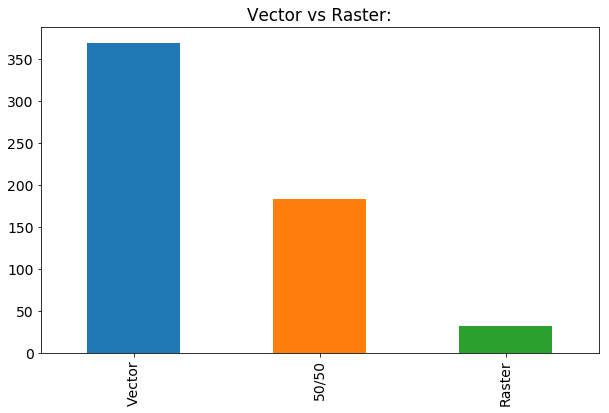

In [86]:
var = survey.groupby('Is your work primarily vector or raster based?').size().sort_values(ascending=False)
print(var)

print("\nPercentages:")
var2 = survey.groupby('Is your work primarily vector or raster based?').size() * 100 / len(survey)
print(var2.sort_values(ascending=False))


my_plot = var.plot(kind='bar', title="Vector vs Raster:")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Other software:
Counts:
Python                                         363
SQL Server                                     209
Access                                         146
PostGIS                                        125
FME                                            117
R                                              106
GDAL                                           105
GIMP                                            88
PyCharm                                         86
nan                                             83
Pix4D                                           41
InDesign                                        34
Microstation                                    27
SAS                                             14
Matlab                                          14
Excel                                           10
Stata                                            6
Oracle                                           5
Tableau                                          3
Illustr

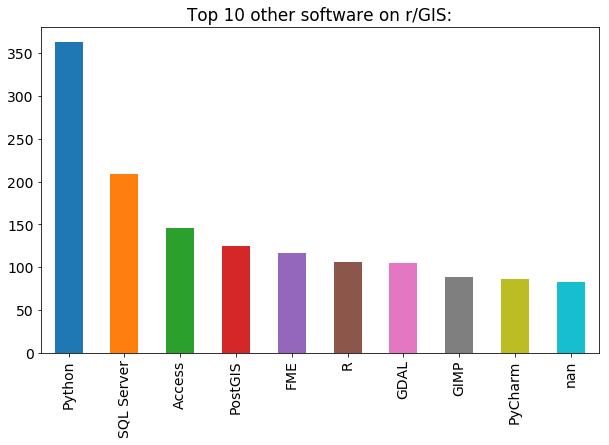

In [71]:
print("Other software:")

survey=pd.read_csv("GIS_Official_Survey.csv",parse_dates=['Timestamp'])
survey_software = survey

survey_software2 = survey

# Rename our colmun, who designed this survey!?!?!
survey_software2 = survey_software2[["Apart from GIS software, what other software do you use for your work?"]]
survey_software2.columns = ['a']

# Strip extra space at start/end
survey_software2['a'] = survey_software2['a'].replace('Adobe', ',', regex=True)
survey_software2['a'] = survey_software2['a'].map(lambda x: str(x).strip())
survey_software2['a'] = survey_software2['a'].replace(', |, ', ',', regex=True)
survey_software2['a'] = survey_software2['a'].replace(',', ';', regex=True)

# Seperate out semicolon seperated software lists
survey_software_list2 = survey_software2.a.str.get_dummies(sep=";")

print("Counts:")
var = survey_software_list2.sum().sort_values(ascending=False)
print(var)

print("\nPercentages:")
var2 = (survey_software_list2.sum() / len(survey)) * 100
print(var2.sort_values(ascending=False).nlargest(10))

var = var.nlargest(10)
my_plot = var.plot(kind='bar', title="Top 10 other software on r/GIS:")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Programming?
Counts:
Python                                                                      325
No                                                                          235
SQL                                                                         196
JavaScript                                                                  129
C#                                                                           35
.NET                                                                         27
Java                                                                         26
R                                                                            17
Mapbasic                                                                      2
r                                                                             2
R, Fortran, C++                                                               1
HTML5/CSS3 is sufficiently complicated as to call it 'programming,' IYAM      1
Arcade             

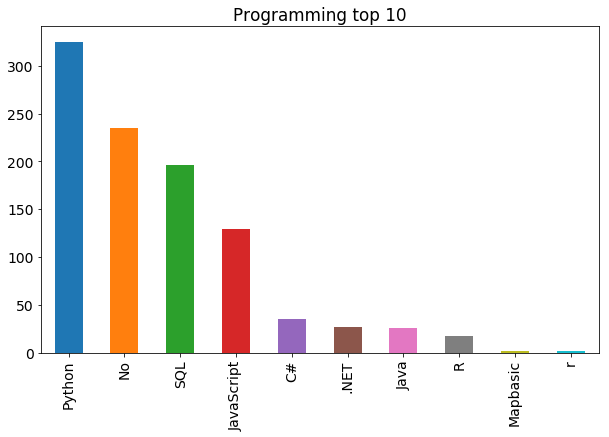

In [72]:
print("Programming?")

survey=pd.read_csv("GIS_Official_Survey.csv",parse_dates=['Timestamp'])
survey_prog = survey

# Rename our colmun, who designed this survey!?!?!
survey_prog = survey_prog[["Does your work require programming?"]]
survey_prog.columns = ['a']

# Seperate out semicolon seperated software lists
survey_prog_list = survey_prog.a.str.get_dummies(sep=";")

print("Counts:")
var = survey_prog_list.sum().sort_values(ascending=False)
print(var)

print("\nPercentages:")
var2 = (survey_prog_list.sum() / len(survey)) * 100
print(var2.sort_values(ascending=False).nlargest(10))

var = var.nlargest(10)
my_plot = var.plot(kind='bar', title="Programming top 10")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Database of choice?
Counts:
Database of choice?
File Geodatabase (ESRI)                                                                               223
PostgreSQL                                                                                            115
SQL Server                                                                                            108
None (ShapeFiles baby)                                                                                 80
SQLite (SpatiaLite, GeoPackage)                                                                        21
Oracle                                                                                                 19
Personal Geodatabase (ESRI)                                                                            15
MySQL                                                                                                   7
none (rasters baby)                                                                                     

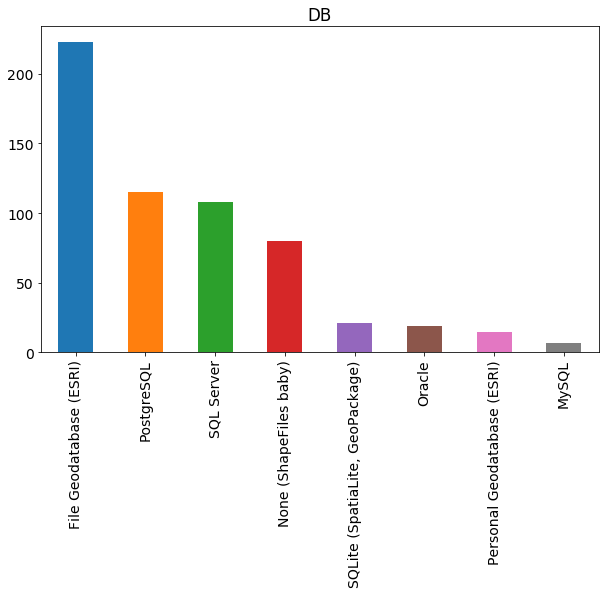

In [74]:
print("Database of choice?")

print("Counts:")
var = survey.groupby('Database of choice?').size().sort_values(ascending=False)
print(var)

print("\nPercentages:")
var2 = survey.groupby('Database of choice?').size() * 100 / len(survey)
print(var2.sort_values(ascending=False))

my_plot = var.nlargest(8).plot(kind='bar', title="DB")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

Certification?
Counts:
Do you have a professional certification?
No            533
GISP           38
CGeog (UK)      3
dtype: int64

Percentages:
Do you have a professional certification?
No                                                                                              89.579832
GISP                                                                                             6.386555
CGeog (UK)                                                                                       0.504202
esri                                                                                             0.168067
Esri developer                                                                                   0.168067
AWS Solutions Architect Associate                                                                0.168067
Advanced Diploma GIS                                                                             0.168067
Community College GIS Certificate                                     

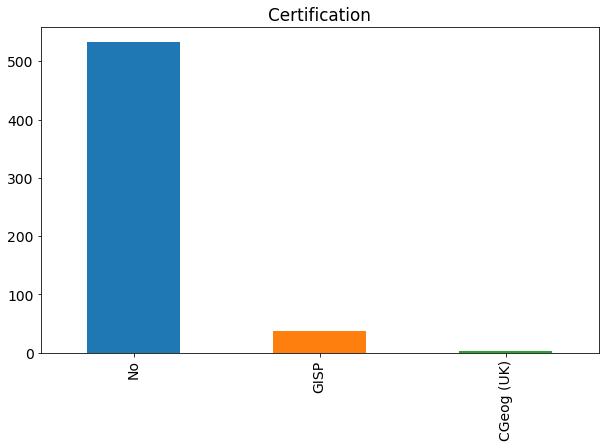

In [78]:
print("Certification?")

print("Counts:")
var = survey.groupby('Do you have a professional certification?').size().sort_values(ascending=False).nlargest(3)
print(var)

print("\nPercentages:")
var2 = survey.groupby('Do you have a professional certification?').size() * 100 / len(survey)
print(var2.sort_values(ascending=False))

my_plot = var.plot(kind='bar', title="Certification")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

How happy are you with your choice of GIS as profession?
count    595.000000
mean       7.670588
std        1.672432
min        1.000000
25%        7.000000
50%        8.000000
75%        9.000000
max       10.000000
Name: How happy are you with your choice of GIS as profession?, dtype: float64


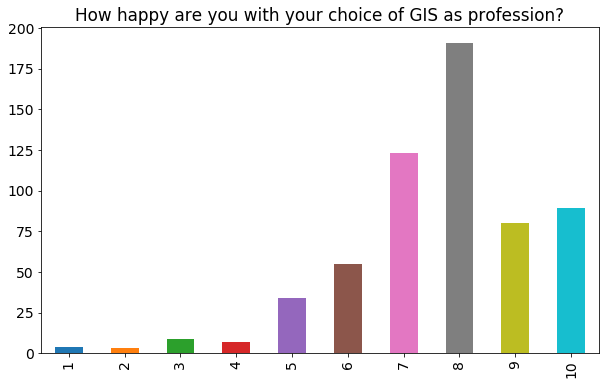

In [76]:
print("How happy are you with your choice of GIS as profession?")

print(survey['How happy are you with your choice of GIS as profession?'].describe())

var = survey.groupby('How happy are you with your choice of GIS as profession?').size() #.sort_values(ascending=False)

my_plot = var.plot(kind='bar', title="How happy are you with your choice of GIS as profession?")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).

How optimistic are you about the future of GIS as a profession?
count    595.000000
mean       7.438655
std        2.096378
min        1.000000
25%        6.000000
50%        8.000000
75%        9.000000
max       10.000000
Name: How optimistic are you about the future of GIS as a profession?, dtype: float64


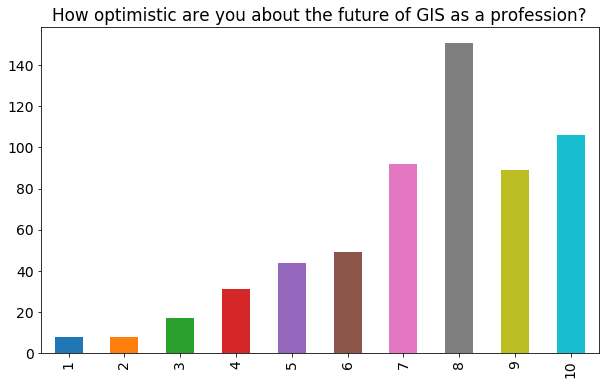

In [77]:
print("How optimistic are you about the future of GIS as a profession?")

print(survey['How optimistic are you about the future of GIS as a profession?'].describe())

var = survey.groupby('How optimistic are you about the future of GIS as a profession?').size() #.sort_values(ascending=False)

my_plot = var.plot(kind='bar', title="How optimistic are you about the future of GIS as a profession?")
my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.patch.set_facecolor('None') #or ax.patch.set_visible(False).